# Executive Summary

The aim of this task was to build machine learning model, based on provided data to predict an initial interest in the long-term gym subscription. The first step was to preprocessed data. Most columns had a text values so I had to transform it into numeric values. Another significant step was extracting useful information from the json file. After preprocessing data it was time to decide which machine learning model will be the most suitable for our problem. To obtain the best results I used corss-validation and GridSearch. It helped me to identify the best model and the optimal hyperparameters. It turned out that GradientBoostingClassifier achieved the best results: F1 Score - 0.7284 and accuracy - 0.9022. A detailed description is provided below. 

# Input Data and Transformations

### Input csv and json file

Input data was divided into two groups - train and test. Each train and test file consisted of csv and json file. Csv file contained structured data in contrast to json file which contained unstructured data. From json file I created DataFrame and joined it with target column from csv file. I checked which group are the most popular among people with target 1 and 0. Next I created two additional numerical columns count_groups_target1 and count_groups_target0 where I store information about the number of groups a given person belongs to. In one column are groups popular among people with target 1 and in second - with target 0. I joined the two newly created columns to DataFrame created from csv file.

### EDA and data transformation

In order to understand the data I conducted exploratory data analysis. It gave me information about data types, missing values, correlation between columns and also which columns aren't useful for furrther consideration. I decided to remove name, location, location_from  and credit_card_type columns.
I found out that most data was object type so I had to transform this data into numeric type in order to build machine lerning model. 
First I took into consideration occupations column. I grouped occupations into three category 0 - means sedentary work, 2 - physical work, 1 - in between physical and sedentary work and then I created new column job_physical_activity and remove  occupations column. The next column that I modified was the sex column. I replaced male into 0 and female into 1. I also modified dob column. I took the year from column and I substracted it from current year. It allowed me to obtain information about the age. The hobbies column also had to be transformed. From hobbies column I created list of hobbies related to sport. Then I counted how much every user id had hobbies related to sport and I saved this information in new column sport_related_hobbies and finally I removed hobbies column. For relationship_status column I conducted one hot encoding.

### Missing values

Due to the small amount of missing data, I decided to replace missing values with the most frequent value.

### Standarization

I chose StandardScaler from sklearn library to perform standardization in order  to bring down all the features to a common scale without distorting the differences in the range of the values.

### EDA for train data

I conducted exploratory data analysis for train data to better understand and compare to test data.

In [538]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [539]:
df = pd.read_csv("train.csv")

In [540]:
df.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN


In [541]:
df.shape

(4000, 16)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   4000 non-null   int64  
 1   target                    4000 non-null   int64  
 2   name                      3982 non-null   object 
 3   sex                       3616 non-null   object 
 4   dob                       3606 non-null   object 
 5   location                  4000 non-null   object 
 6   location_population       4000 non-null   int64  
 7   location_from             4000 non-null   object 
 8   location_from_population  4000 non-null   int64  
 9   occupation                4000 non-null   object 
 10  hobbies                   3320 non-null   object 
 11  daily_commute             3595 non-null   float64
 12  friends_number            4000 non-null   int64  
 13  relationship_status       3607 non-null   object 
 14  educatio

We can see that the dataset contain null values. Nine columns are object type, five are int64 and the rest are float64.

In [543]:
df.isnull().sum()

user_id                       0
target                        0
name                         18
sex                         384
dob                         394
location                      0
location_population           0
location_from                 0
location_from_population      0
occupation                    0
hobbies                     680
daily_commute               405
friends_number                0
relationship_status         393
education                   408
credit_card_type            428
dtype: int64

Above we can see the number of missing values in each columns.

In [544]:
df.describe()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,education
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3595.000000,4000.000000,3592.000000
mean,1999.500000,0.201500,3.105877e+05,2.910267e+05,50.098748,199.877750,3.670935
std,1154.844867,0.401171,4.878360e+05,4.717641e+05,28.806060,90.494937,1.327582
min,0.000000,0.000000,7.860000e+02,1.031000e+03,0.000000,0.000000,1.000000
25%,999.750000,0.000000,2.435725e+04,2.422050e+04,25.000000,143.000000,3.000000
50%,1999.500000,0.000000,8.007200e+04,7.379100e+04,50.000000,199.000000,4.000000
75%,2999.250000,0.000000,3.523130e+05,3.398500e+05,75.000000,256.000000,5.000000
max,3999.000000,1.000000,1.764615e+06,1.764615e+06,99.000000,619.000000,6.000000


To better understand the numeric data I use describe() method - it gives understanding of the central tendencies.

In [545]:
df.describe(include=['object'])

,name,sex,dob,location,location_from,occupation,hobbies,relationship_status,credit_card_type
count,3982,3616,3606,4000,4000,4000,3320,3607,3572
unique,205,2,3242,645,650,43,2745,5,4
top,Franciszek,female,2000-03-20,Warszawa,Warszawa,Science and engineering associate professionals,Gym,In relationship,Visa
freq,38,2040,4,332,306,106,20,1247,1777


The default setting of 'describe' skips variables of type object. We can apply the method 'describe' on the variables of type 'object'.

__Distributions of all numeric variables__

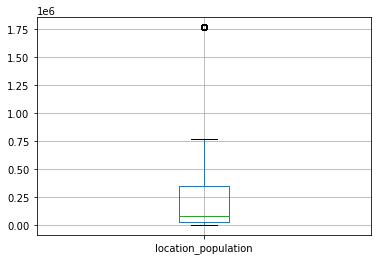

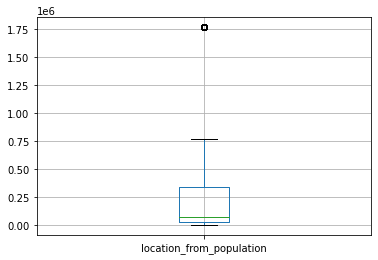

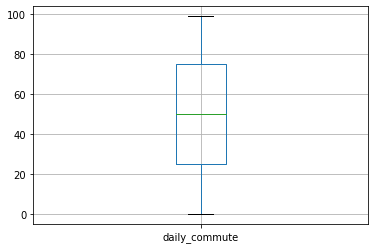

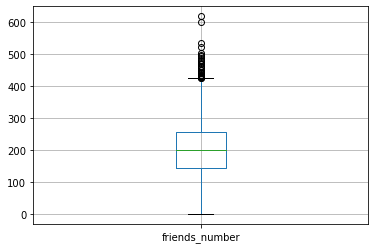

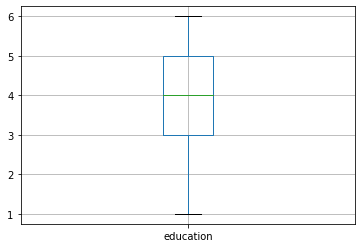

In [546]:
columns = ['location_population','location_from_population','daily_commute','friends_number','education']

for col in columns:
    df.boxplot(column=col)
    plt.show()

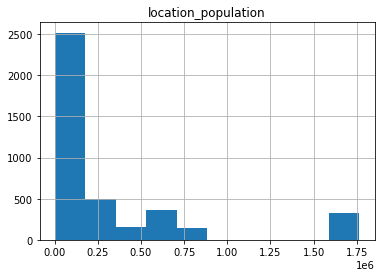

skew        2.152610
kurtosis    3.667186
Name: location_population, dtype: float64


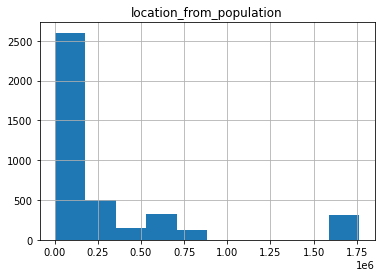

skew        2.302725
kurtosis    4.401283
Name: location_from_population, dtype: float64


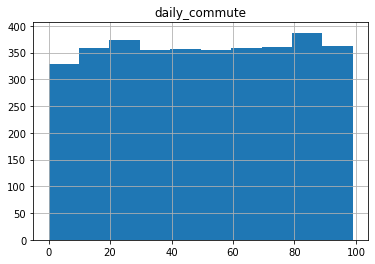

skew       -0.007612
kurtosis   -1.211932
Name: daily_commute, dtype: float64


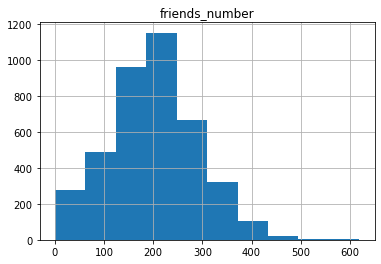

skew        0.120286
kurtosis    0.191918
Name: friends_number, dtype: float64


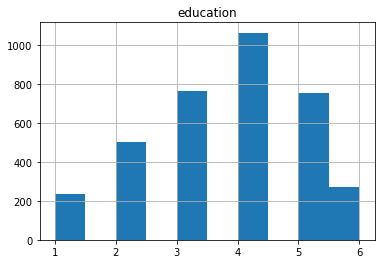

skew       -0.218158
kurtosis   -0.642943
Name: education, dtype: float64


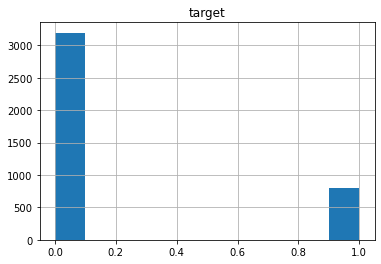

skew        1.488889
kurtosis    0.216898
Name: target, dtype: float64


In [547]:
columns.append('target')
for col in columns:
    df.hist(column=col)
    plt.show()
    print(df[col].agg(['skew', 'kurtosis']).transpose())

Histograms reveal interesting data about target column. We see a significant disproportion. The dataset has more records for those not interested in a long-term gym subscription. Thic could affect on model quality but it will be tested below.

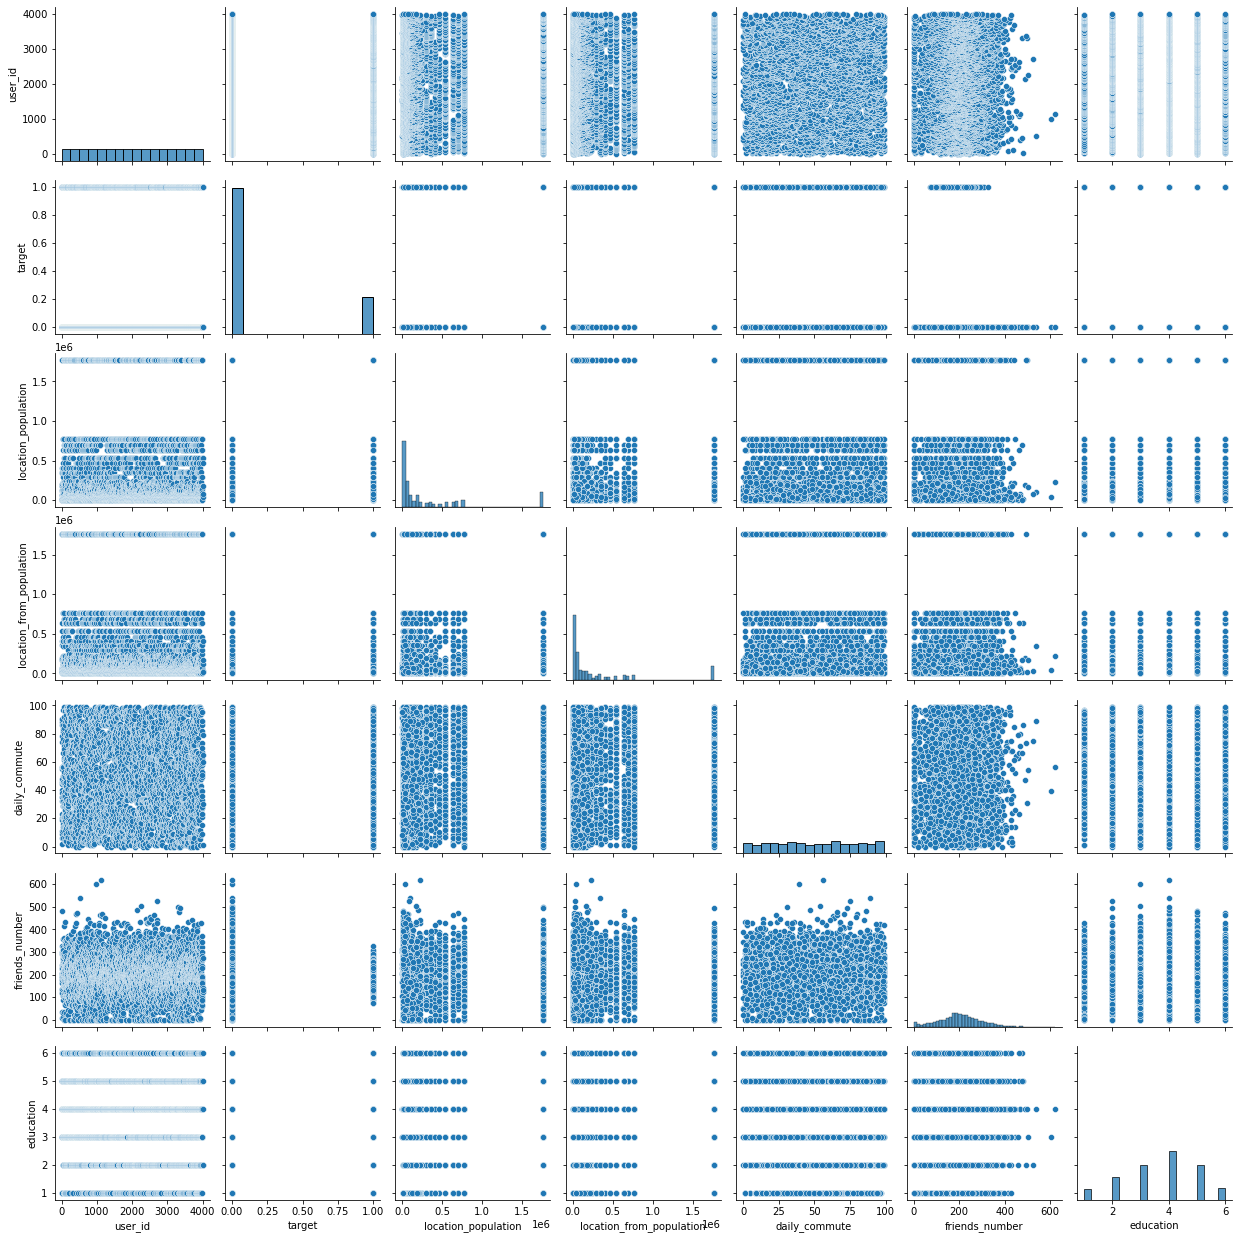

In [548]:
sns.pairplot(data = df)

In [549]:
corrMatrix = df.corr()

<AxesSubplot:>

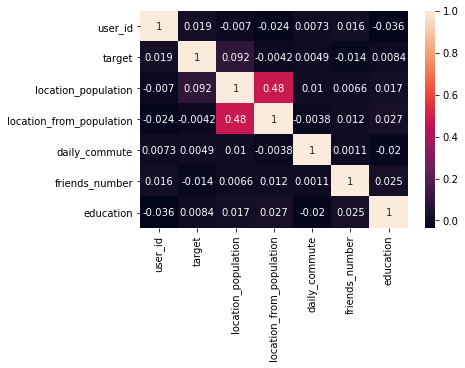

In [550]:
sns.heatmap(corrMatrix, annot = True)

A correlation matrix shows correlation coefficients between variables. Each cell in the table shows the correlation between two variables. All reasults are close to 0 which means that we dont have correlation between variables. A pairplot also does not show any interesting trends. 

In [551]:
df.relationship_status.unique()

array(['Single', 'In relationship', 'Married with kids', nan, 'Married',
       'Divorced'], dtype=object)

<AxesSubplot:>

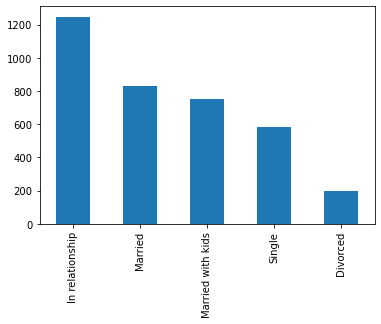

In [552]:
df.relationship_status.value_counts().plot.bar()

In [553]:
df['relationship_status'].value_counts()
relationship_status_grouped = df.groupby(['target','relationship_status']).size()
relationship_status_grouped

target  relationship_status
0       Divorced                161
        In relationship        1016
        Married                 706
        Married with kids       717
        Single                  285
1       Divorced                 35
        In relationship         231
        Married                 124
        Married with kids        32
        Single                  300
dtype: int64

Data above shows different relationship status for people in different target group. We can see that the most people interested in long-term gym subscription are single and the most people not interested in long-term gym subscription are in relationship, married or married with kids.

__We can remove name, location and location_from column because they don't contain useful information for ML model__

In [554]:
df.drop('name', inplace=True, axis=1)
df.drop('location', inplace=True, axis=1)
df.drop('location_from', inplace=True, axis=1)

### Working with json file

Reading json file using pandas library, iterate over all data and save in DataFrame columns - user_id, group_name, date_joined. Many people had several groups and I decided to add every group in separate row.

In [555]:
groups = pd.read_json('train.json')

l = []
for _, row in groups.iterrows():
    groups_and_time = row['data']['groups']['data']
    idx = row['data']['id']
    for item in groups_and_time:
        l.append([idx.strip(), item['group_name'].strip(), item['date_joined'].strip()])

df_groups = pd.DataFrame(l, columns=['user_id', 'group_name', 'date_joined'])
df_groups.head()

,user_id,group_name,date_joined
0,0,Let's excercise together and lose a few kilo q...,2008-09-05 09:55:18.730066
1,0,Strongman competition,2008-05-22 21:25:22.572365
2,0,Fast food 4 life,2012-02-02 05:26:01.293628
3,0,alternative medicine - Hypnosis and bioenergot...,2008-07-05 05:47:12.254848
4,1,Tom Cruise group,2009-06-14 16:48:28.606142


__Checking how many people belong to each groups__

In [556]:
df_groups.group_name.value_counts()

Favorite Recipes                                                                83
Advertising - for creative advertisers and advertisee                           82
Beauty of nature - photography group                                            81
Marketing - networking group                                                    80
Cooking - italian cuisine                                                       80
                                                                                ..
Apartments - will rent / looking to rent (Sosnowiec)                             1
The calse dancing group (Kwidzyn)                                                1
Work abroad - join to find well paid work and enjoy the experience (Muszyna)     1
Tutoring - will teach / looking for a tutor (Krapkowice)                         1
Apartments - will rent / looking to rent (Ożarów)                                1
Name: group_name, Length: 4207, dtype: int64

In [557]:
df_groups.group_name.nunique()

4207

__I decided to consider only those groups where the number of participants exceeded 19 to reduce unpopular groups.__

In [558]:
counts = df_groups.group_name.value_counts()

df_groups_popular = df_groups[~df_groups.group_name.isin(counts[counts < 19].index)].copy()
df_groups_popular.group_name.value_counts()

Favorite Recipes                                                                          83
Advertising - for creative advertisers and advertisee                                     82
Beauty of nature - photography group                                                      81
Marketing - networking group                                                              80
Rolls-Royce and Bentley Motor Cars Public Group                                           80
                                                                                          ..
Let's excercise together and lose a few kilo quicker - everyone is welcome! (Warszawa)    21
Online job market - join us! (Warszawa)                                                   21
Tutoring - will teach / looking for a tutor (Warszawa)                                    21
Automotive Technical School (Warszawa)                                                    19
The calse dancing group (Warszawa)                                    

In [559]:
df_groups_popular.group_name.nunique()

166

This action reduced the number of groups from 4207 to 166.

__Type convertion on user_id column__

In [560]:
df_groups_popular.head()
df_groups_popular['user_id'] = df_groups_popular['user_id'].astype('int64')
df_groups_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9519 entries, 1 to 16117
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      9519 non-null   int64 
 1   group_name   9519 non-null   object
 2   date_joined  9519 non-null   object
dtypes: int64(1), object(2)
memory usage: 297.5+ KB


### Joining dataframes 

To further analysis I had to join DataFrame created from json file with target variable.

In [561]:
df_groups_popular.head()

,user_id,group_name,date_joined
1,0,Strongman competition,2008-05-22 21:25:22.572365
2,0,Fast food 4 life,2012-02-02 05:26:01.293628
3,0,alternative medicine - Hypnosis and bioenergot...,2008-07-05 05:47:12.254848
4,1,Tom Cruise group,2009-06-14 16:48:28.606142
9,2,Polish wildlife - best places,2007-07-29 18:15:49.603727


In [562]:
data_popular_groups_target = pd.merge(df_groups_popular, df[['user_id', 'target']], how="left", on=['user_id'])

In [563]:
data_popular_groups_target.head()

,user_id,group_name,date_joined,target
0,0,Strongman competition,2008-05-22 21:25:22.572365,1
1,0,Fast food 4 life,2012-02-02 05:26:01.293628,1
2,0,alternative medicine - Hypnosis and bioenergot...,2008-07-05 05:47:12.254848,1
3,1,Tom Cruise group,2009-06-14 16:48:28.606142,0
4,2,Polish wildlife - best places,2007-07-29 18:15:49.603727,1


In [564]:
data_popular_groups_target.shape
 

(9519, 4)

__Finding the most popular groups among people with target 1__

In [565]:
data_target1 = data_popular_groups_target[data_popular_groups_target['target'] == 1]

grouped_data_target1= data_target1.groupby('group_name')['user_id'].count().sort_values(ascending=False)[:20]


__Top 20 groups for people with target 1__

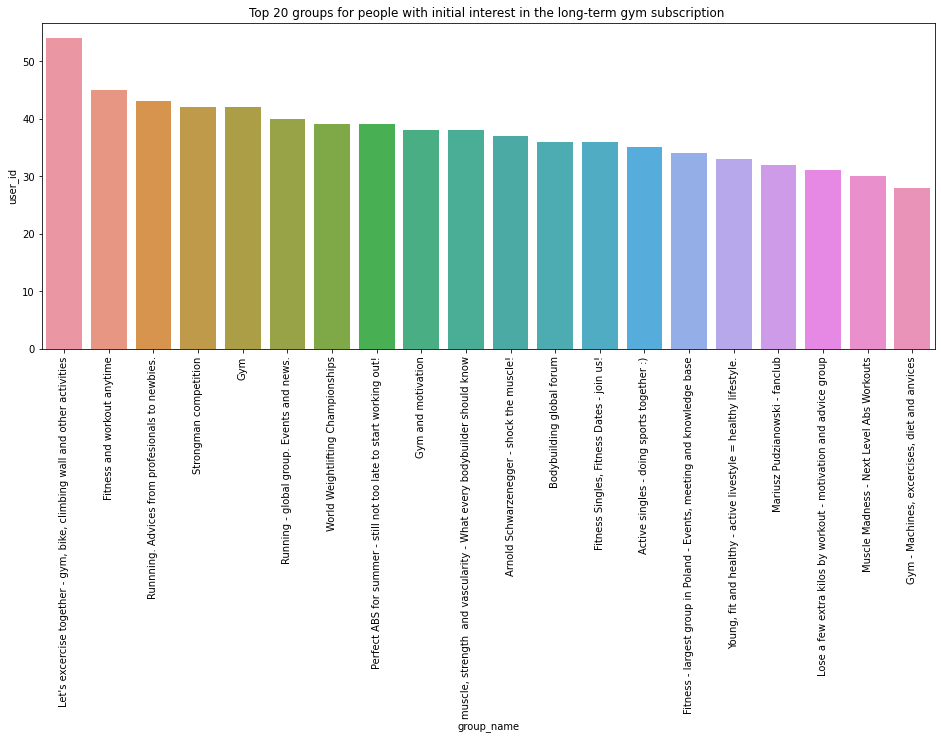

In [566]:
plt.figure(figsize=(16, 6))
plt.title('Top 20 groups for people with initial interest in the long-term gym subscription ')
chart = sns.barplot(x=grouped_data_target1.index, y=grouped_data_target1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

__Finding the most popular groups among people with target 0__

In [567]:
data_target0 = data_popular_groups_target[data_popular_groups_target['target'] == 0]

grouped_data_target0= data_target0.groupby('group_name')['user_id'].count().sort_values(ascending=False)[:10]

__Top 10 groups for people with target 0__

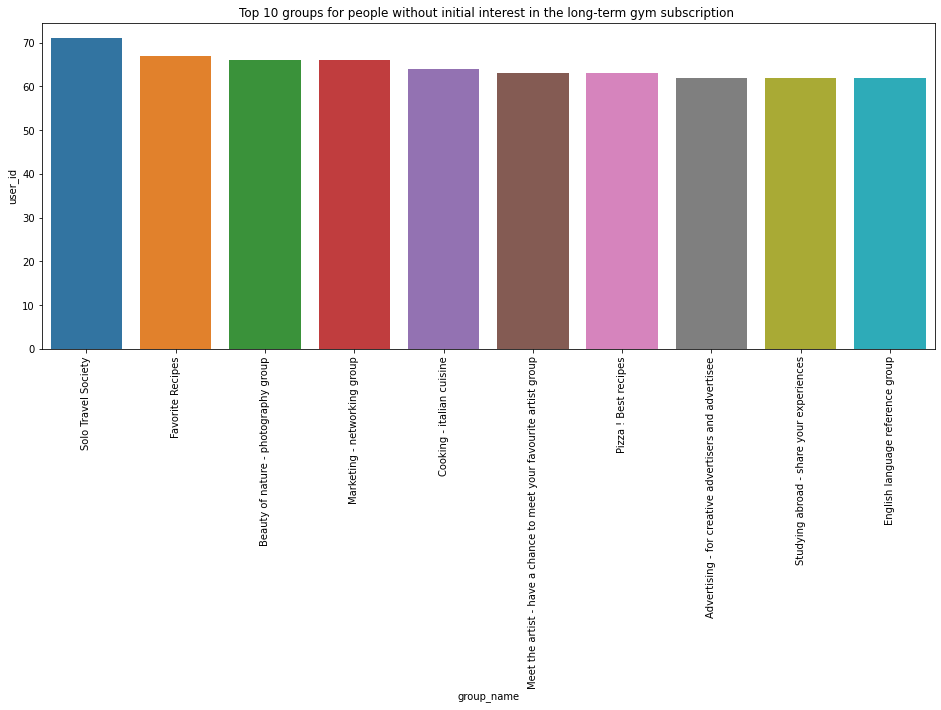

In [568]:
plt.figure(figsize=(16, 6))
plt.title('Top 10 groups for people without initial interest in the long-term gym subscription ')
chart = sns.barplot(x=grouped_data_target0.index, y=grouped_data_target0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

__How many groups from the top groups for a given target a person belongs to?__

In [569]:
from collections import defaultdict
from datetime import datetime
current_year = datetime.now().year
 
groups_target1 = defaultdict(int)
groups_target0 = defaultdict(int)

for _, row in groups.iterrows():
    groups_and_time = row['data']['groups']['data']
    idx = int(row['data']['id'])
    for item in groups_and_time:
        if item['group_name'] in grouped_data_target1.index.values:
            groups_target1[idx] += 1
            
        if item['group_name'] in grouped_data_target0.index.values:
            groups_target0[idx] += 1

In [570]:
df_top_groups_target1 = pd.DataFrame.from_dict(groups_target1, orient='index', columns=['count_groups_target1']).reset_index()
df_top_groups_target1.rename(columns = {'index':'user_id'}, inplace = True)

df_top_groups_target1.head()

,user_id,count_groups_target1
0,0,1
1,8,1
2,22,1
3,23,2
4,26,2


In [571]:
df_top_groups_target0 = pd.DataFrame.from_dict(groups_target0, orient='index', columns=['count_groups_target0']).reset_index()
df_top_groups_target0.rename(columns = {'index':'user_id'}, inplace = True)

df_top_groups_target0.head()

,user_id,count_groups_target0
0,6,1
1,8,3
2,12,1
3,14,1
4,20,2


__Merge processed json data with csv data__

In [572]:
user_and_groups_data = pd.merge(df, df_top_groups_target1, how="left", on=['user_id']).copy()

In [573]:
user_and_groups_data = pd.merge(user_and_groups_data, df_top_groups_target0, how="left", on=['user_id'])

In [574]:
user_and_groups_data['count_groups_target0'] = user_and_groups_data['count_groups_target0'].fillna(0).astype(int)
user_and_groups_data['count_groups_target1'] = user_and_groups_data['count_groups_target1'].fillna(0).astype(int)
user_and_groups_data.head()

,user_id,target,sex,dob,location_population,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,count_groups_target1,count_groups_target0
0,0,1,NaN,1982-08-07,22732,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,1,0
1,1,0,male,1971-10-28,18331,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,0,0
2,2,1,NaN,2000-07-05,4879,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,0,0
3,3,0,female,1992-06-10,352313,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa,0,0
4,4,0,NaN,1975-01-09,2322,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN,0,0


### Categorical values transformation

I grouped occupations into three category
* 0 - means sedentary work, 2 - physical work, 1 - in between physical and sedentary work

In [575]:
# df['occupation'].value_counts().index.values
# job_dict = {}

# for job in df['occupation'].value_counts().index.values:
#     job_dict[job] = input(job)

In [576]:
#job_df = pd.DataFrame.from_dict(job_dict,orient='index').reset_index()

In [577]:
# job_df.rename(columns = {'index':'occupation', 0:'job_physical_activity'}, inplace = True)
# job_df.to_csv('occupations.csv', index = False)
# job_df


In [578]:
job_df = pd.read_csv('occupations.csv')
job_df.head()

,occupation,job_physical_activity
0,Science and engineering associate professionals,0
1,Health associate professionals,1
2,Information and communications technology prof...,0
3,General and keyboard clerks,0
4,"Food processing, wood working, garment and oth...",2


__Joining the newly created DataFrame with DataFrame containing all the data.__

In [579]:
df = pd.merge(user_and_groups_data, job_df, how="left", on=['occupation'])

In [580]:
df.drop('occupation', inplace=True, axis=1)

In [581]:
df.head()

,user_id,target,sex,dob,location_population,location_from_population,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,count_groups_target1,count_groups_target0,job_physical_activity
0,0,1,NaN,1982-08-07,22732,22732,Fitness,46.0,196,Single,NaN,Visa,1,0,0
1,1,0,male,1971-10-28,18331,18331,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,0,0,0
2,2,1,NaN,2000-07-05,4879,4879,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,0,0,2
3,3,0,female,1992-06-10,352313,352313,Badminton,88.0,164,In relationship,3.0,Visa,0,0,0
4,4,0,NaN,1975-01-09,2322,538633,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN,0,0,2


In [582]:
df.shape

(4000, 15)

__Checking if type of work have impact on target variable__

In [644]:
df['job_physical_activity'].value_counts()
job_physical_activity_grouped = df.groupby(['target','job_physical_activity']).size()
job_physical_activity_grouped

target  job_physical_activity
0       0                        1298
        1                         670
        2                        1226
1       0                         306
        1                         180
        2                         320
dtype: int64

<AxesSubplot:>

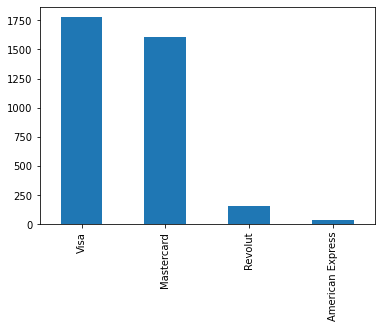

In [583]:
df.credit_card_type.value_counts().plot.bar()

In [584]:
df['credit_card_type'].value_counts()
credit_card_grouped = df.groupby(['target','credit_card_type']).size()

In [585]:
credit_card_grouped

target  credit_card_type
0       American Express      28
        Mastercard          1292
        Revolut              121
        Visa                1402
1       American Express       7
        Mastercard           311
        Revolut               36
        Visa                 375
dtype: int64

From above table we can state that credit card type does not have impact on target variable because number of users of different card types is proportional to size of groups resulting from target variable.

In [586]:
df.drop('credit_card_type', inplace=True, axis=1)

__Replace female to 1 and male to 0__

In [587]:
df['sex'].replace(['male','female'], [0,1],inplace=True)

__Replacing date of birth column (dob) for column contained information about age__

In [588]:
from datetime import datetime
current_year = datetime.now().year

In [589]:
df['dob'] = df.dob.str[:4]

In [590]:
df['dob'] = pd.to_numeric(df['dob'], errors='coerce')

In [591]:
df['dob'] = df['dob'].astype('Int32')

In [592]:
df['dob'] = int(current_year) - df['dob'] 

In [593]:
df.hobbies.value_counts()

Gym                                                          20
Cardio                                                       18
Squash                                                       17
Bodybuilding                                                 16
Weightlifting                                                15
                                                             ..
Stretching,Shopping                                           1
Badminton,Gym,Amateur radio,Parkour                           1
Power bike,Stretching,Badminton,Vehicle restoration,Drama     1
Knapping,Horseback riding                                     1
Gym,Mountain biking,Cycling,Netball                           1
Name: hobbies, Length: 2745, dtype: int64

In [594]:
list_of_hobbies = ['Gym','Cardio','Squash','Bodybuilding','Stretching','Weightlifting','Crossfit','Power bike','Badminton','Rowing','Kettleballs','Dance','Fitness','Rafting','Skydiving','Jogging','Skateboarding','Ice skating','Skimboarding','Rock climbing','Archery','Horseback riding','Parkour','Table tennis','Sports','Hooping','Air sports','Cycling','Flag Football','Crossfit,Stretching','Motor sports','Hiking','Rugby','Water sports','Orienteering','Kitesurfing','Basketball','Tai chi','Brazilian jiu-jitsu','Surfing','Rappelling','Taekwondo','Kayaking','Snowboarding','Slacklining','Mountaineering','Swimming','Yoga','BASE jumping','Blacksmithing','Scuba diving','Netball','Roller skating','Kabaddi','Mountain biking','Running']

In [595]:
def count_sport_related_hobbies(row):
    return sum([1 if hobby in str(row['hobbies']) else 0 for hobby in list_of_hobbies])

In [596]:
df['sport_related_hobbies'] = df.apply(count_sport_related_hobbies, axis=1)

In [597]:
df['sport_related_hobbies'].head()

0    1
1    1
2    2
3    1
4    1
Name: sport_related_hobbies, dtype: int64

In [598]:
df.drop('hobbies', inplace=True, axis=1)

From the hobbies column, I chose the names of sport-related hobbies, then I checked whether a given row in DataFrame contains items from the previously created list, I summed up the hobbies found for each row in DataFrame, i.e. 1 - when a person is interested in one item from the list, 2 - when a person is interested in two items from the list, etc.

Before one hot encoding for relationship_status column I decided to fill missing values for relationship_status with the most frequent value because one hot encoding replace missing values with 0 which could affect the quality of the data.

In [599]:
df['relationship_status'] = df['relationship_status'].fillna(df['relationship_status'].mode()[0])

### One hot encoding for relationship_status column

One hot encoding produced 5 additional columns with value 1 or 0. 

In [600]:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns = ['relationship_status'])

In [601]:
df.head()

,user_id,target,sex,dob,location_population,location_from_population,daily_commute,friends_number,education,count_groups_target1,count_groups_target0,job_physical_activity,sport_related_hobbies,Divorced,In relationship,Married,Married with kids,Single
0,0,1,NaN,40,22732,22732,46.0,196,NaN,1,0,0,1,0,0,0,0,1
1,1,0,0.0,51,18331,18331,55.0,243,NaN,0,0,0,1,0,0,0,0,1
2,2,1,NaN,22,4879,4879,90.0,191,3.0,0,0,2,2,0,1,0,0,0
3,3,0,1.0,30,352313,352313,88.0,164,3.0,0,0,0,1,0,1,0,0,0
4,4,0,NaN,47,2322,538633,40.0,119,5.0,0,0,2,1,0,0,0,1,0


### Dealing with missing values

In [602]:
df.isnull().sum()

user_id                       0
target                        0
sex                         384
dob                         394
location_population           0
location_from_population      0
daily_commute               405
friends_number                0
education                   408
count_groups_target1          0
count_groups_target0          0
job_physical_activity         0
sport_related_hobbies         0
Divorced                      0
In relationship               0
Married                       0
Married with kids             0
Single                        0
dtype: int64

In [603]:
import missingno as msno

<AxesSubplot:>

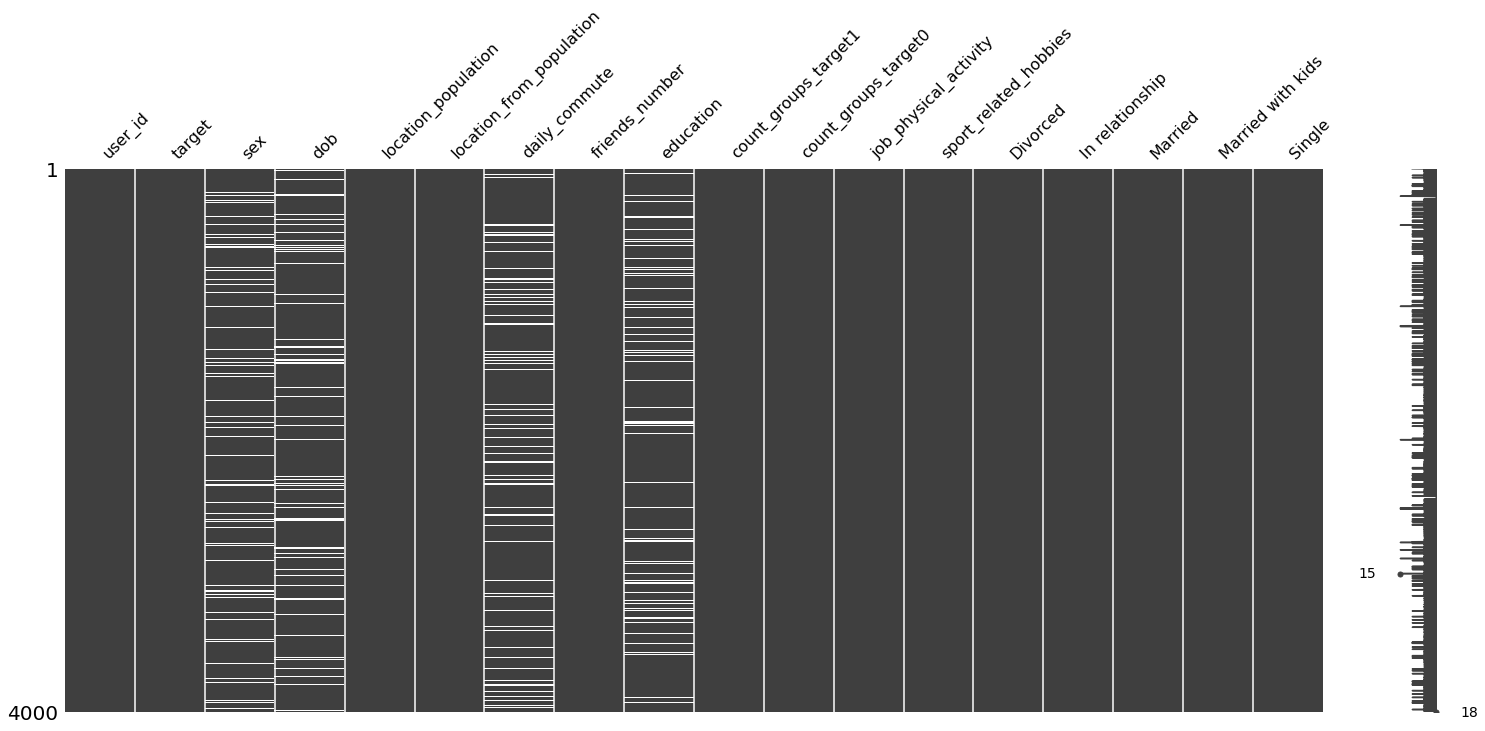

In [604]:
msno.matrix(df)

<AxesSubplot:>

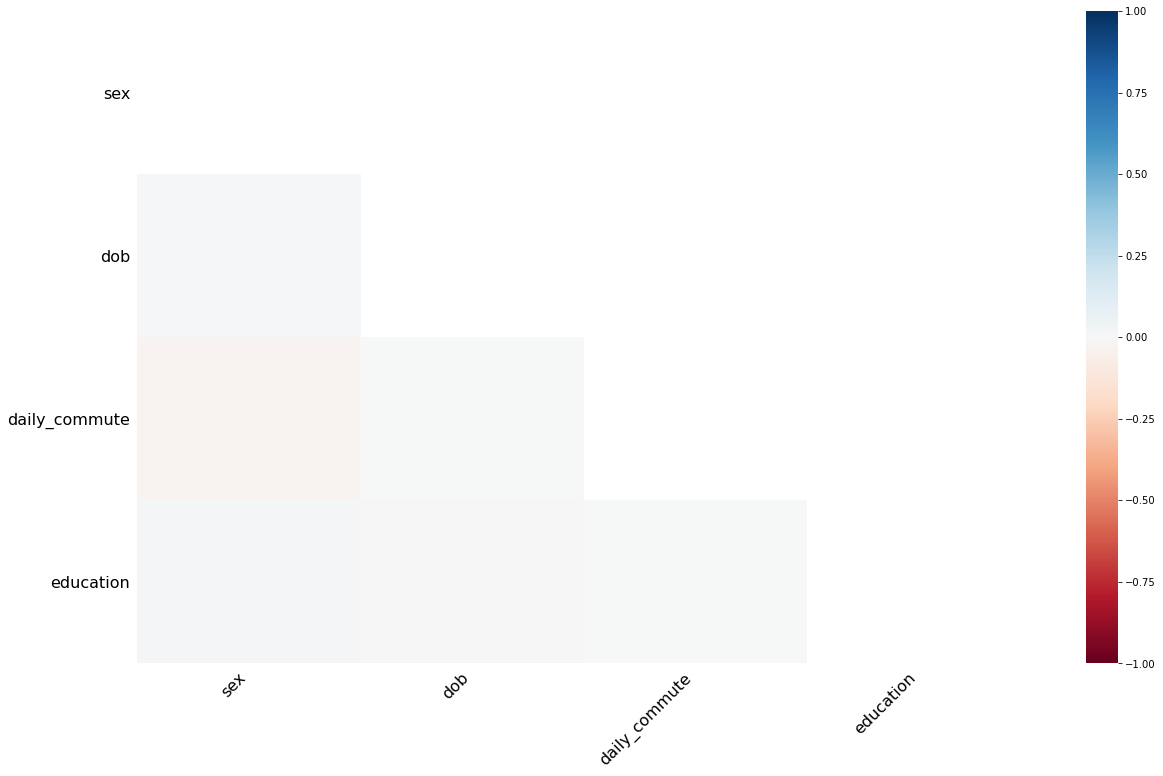

In [605]:
msno.heatmap(df)

The heatmap function shows that there are no strong correlations between missing values of different features.Low correlations indicate that the data are MAR - Missing at Random. Chart above msno.matrix also provides that no trends were observed among the missing values.

### Filling missing data with the most frequent values

In [606]:
df_with_mode = df.fillna(df.mode().iloc[0])

In [607]:
df_with_mode.head()

,user_id,target,sex,dob,location_population,location_from_population,daily_commute,friends_number,education,count_groups_target1,count_groups_target0,job_physical_activity,sport_related_hobbies,Divorced,In relationship,Married,Married with kids,Single
0,0,1,1.0,40,22732,22732,46.0,196,4.0,1,0,0,1,0,0,0,0,1
1,1,0,0.0,51,18331,18331,55.0,243,4.0,0,0,0,1,0,0,0,0,1
2,2,1,1.0,22,4879,4879,90.0,191,3.0,0,0,2,2,0,1,0,0,0
3,3,0,1.0,30,352313,352313,88.0,164,3.0,0,0,0,1,0,1,0,0,0
4,4,0,1.0,47,2322,538633,40.0,119,5.0,0,0,2,1,0,0,0,1,0


In [608]:
df_with_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   4000 non-null   int64  
 1   target                    4000 non-null   int64  
 2   sex                       4000 non-null   float64
 3   dob                       4000 non-null   Int32  
 4   location_population       4000 non-null   int64  
 5   location_from_population  4000 non-null   int64  
 6   daily_commute             4000 non-null   float64
 7   friends_number            4000 non-null   int64  
 8   education                 4000 non-null   float64
 9   count_groups_target1      4000 non-null   int32  
 10  count_groups_target0      4000 non-null   int32  
 11  job_physical_activity     4000 non-null   int64  
 12  sport_related_hobbies     4000 non-null   int64  
 13  Divorced                  4000 non-null   uint8  
 14  In relat

### Standarization

To perform standardization I chose StandardScaler from sklearn library. I standarized columns which doesn't contain 1, 0 values.

In [609]:
df_with_mode.columns

Index(['user_id', 'target', 'sex', 'dob', 'location_population',
       'location_from_population', 'daily_commute', 'friends_number',
       'education', 'count_groups_target1', 'count_groups_target0',
       'job_physical_activity', 'sport_related_hobbies', 'Divorced',
       'In relationship', 'Married', 'Married with kids', 'Single'],
      dtype='object')

In [610]:
df_X = df_with_mode[['dob', 'location_population',
       'location_from_population', 'daily_commute', 'friends_number',
       'education', 'count_groups_target1', 'count_groups_target0',
        'job_physical_activity', 'sport_related_hobbies']]
df_y = df_with_mode['target']

In [611]:
scaler = StandardScaler()
standarized = scaler.fit_transform(df_X)
standarized

array([[-0.09231369, -0.59014019, -0.56877633, ..., -0.42982773,
        -1.11068097, -0.05364194],
       [ 0.67363053, -0.59916279, -0.57810631, ..., -0.42982773,
        -1.11068097, -0.05364194],
       [-1.34567695, -0.62674108, -0.60662413, ..., -0.42982773,
         1.14336463,  0.90854529],
       ...,
       [ 1.02178699, -0.4873059 , -0.58529088, ..., -0.42982773,
         0.01634183, -1.01582916],
       [ 0.67363053,  0.31503525, -0.36067384, ..., -0.42982773,
         0.01634183, -0.05364194],
       [-1.20641437, -0.28192844, -0.25006448, ..., -0.42982773,
        -1.11068097, -0.05364194]])

In [612]:
df_standarized_mode = pd.DataFrame(standarized, columns=['dob', 'location_population',
       'location_from_population', 'daily_commute', 'friends_number',
       'education', 'count_groups_target1', 'count_groups_target0',
        'job_physical_activity', 'sport_related_hobbies'])

In [613]:
df_standarized_mode.head()

,dob,location_population,location_from_population,daily_commute,friends_number,education,count_groups_target1,count_groups_target0,job_physical_activity,sport_related_hobbies
0,-0.092314,-0.590140,-0.568776,-0.123408,-0.042856,0.234186,1.368066,-0.429828,-1.110681,-0.053642
1,0.673631,-0.599163,-0.578106,0.205193,0.476575,0.234186,-0.452381,-0.429828,-1.110681,-0.053642
2,-1.345677,-0.626741,-0.606624,1.483083,-0.098114,-0.558322,-0.452381,-0.429828,1.143365,0.908545
3,-0.788627,0.085542,0.129925,1.410061,-0.396511,-0.558322,-0.452381,-0.429828,-1.110681,-0.053642
4,0.395105,-0.631983,0.524918,-0.342475,-0.893839,1.026695,-0.452381,-0.429828,1.143365,-0.053642


__Joining DataFrames - standarized with data containing 1 and 0 values__

In [614]:
df_X = pd.concat([df_standarized_mode, df_with_mode[['sex', 'Divorced', 'In relationship', 'Married', 'Married with kids', 'Single']]], axis=1, join='inner')

In [615]:
df_X.head()

,dob,location_population,location_from_population,daily_commute,friends_number,education,count_groups_target1,count_groups_target0,job_physical_activity,sport_related_hobbies,sex,Divorced,In relationship,Married,Married with kids,Single
0,-0.092314,-0.590140,-0.568776,-0.123408,-0.042856,0.234186,1.368066,-0.429828,-1.110681,-0.053642,1.0,0,0,0,0,1
1,0.673631,-0.599163,-0.578106,0.205193,0.476575,0.234186,-0.452381,-0.429828,-1.110681,-0.053642,0.0,0,0,0,0,1
2,-1.345677,-0.626741,-0.606624,1.483083,-0.098114,-0.558322,-0.452381,-0.429828,1.143365,0.908545,1.0,0,1,0,0,0
3,-0.788627,0.085542,0.129925,1.410061,-0.396511,-0.558322,-0.452381,-0.429828,-1.110681,-0.053642,1.0,0,1,0,0,0
4,0.395105,-0.631983,0.524918,-0.342475,-0.893839,1.026695,-0.452381,-0.429828,1.143365,-0.053642,1.0,0,0,0,1,0


# EDA for test data

In [616]:
df_test = pd.read_csv("test.csv")

In [617]:
df_test.head()

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,Stretching,NaN,146,Single,1.0,Visa
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...","Gym,Kettleballs,Jewelry making",NaN,209,Married with kids,2.0,Visa
2,2,NaN,Adela,female,NaN,Bielawa,30207,Bielawa,30207,Health professionals,Fashion,39.0,213,Married,4.0,Visa
3,3,NaN,Gracja,female,1994-12-07,Żywiec,31560,Dobre Miasto,10293,Protective services workers,"Gym,Badminton,Rowing,Slacklining,Playing music...",42.0,287,Single,4.0,Mastercard
4,4,NaN,Anatol,male,1988-11-08,Rzeszów,189662,Olsztyn,173070,Information and communications technicians,"Orienteering,Skateboarding",NaN,226,In relationship,NaN,Mastercard


In [618]:
df_test.drop('target', inplace=True, axis=1)

In [619]:
df_test.shape

(2000, 15)

In [620]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2000 non-null   int64  
 1   name                      1994 non-null   object 
 2   sex                       1809 non-null   object 
 3   dob                       1809 non-null   object 
 4   location                  2000 non-null   object 
 5   location_population       2000 non-null   int64  
 6   location_from             2000 non-null   object 
 7   location_from_population  2000 non-null   int64  
 8   occupation                2000 non-null   object 
 9   hobbies                   1684 non-null   object 
 10  daily_commute             1796 non-null   float64
 11  friends_number            2000 non-null   int64  
 12  relationship_status       1770 non-null   object 
 13  education                 1817 non-null   float64
 14  credit_c

In [621]:
df_test.isnull().sum()

user_id                       0
name                          6
sex                         191
dob                         191
location                      0
location_population           0
location_from                 0
location_from_population      0
occupation                    0
hobbies                     316
daily_commute               204
friends_number                0
relationship_status         230
education                   183
credit_card_type            205
dtype: int64

<AxesSubplot:>

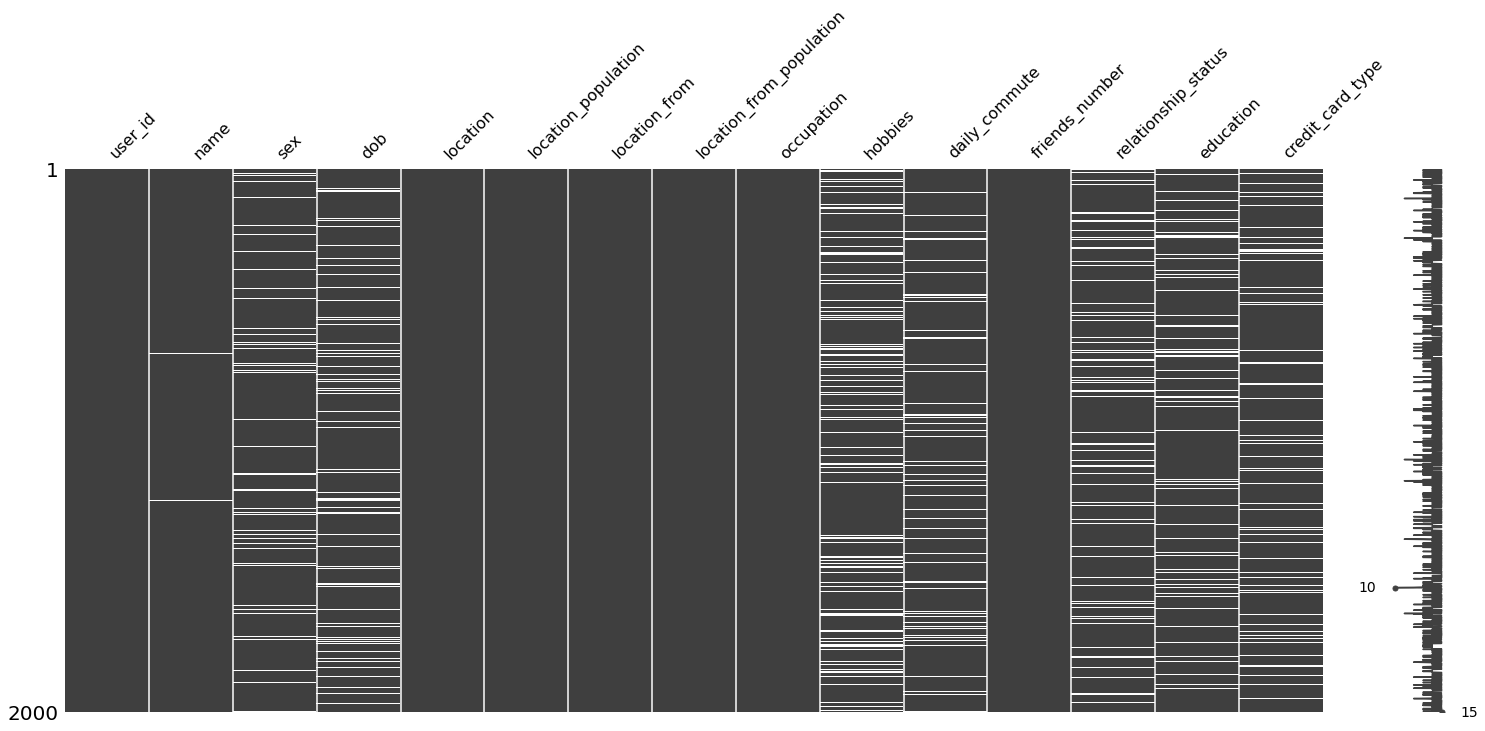

In [622]:
msno.matrix(df_test)

<AxesSubplot:>

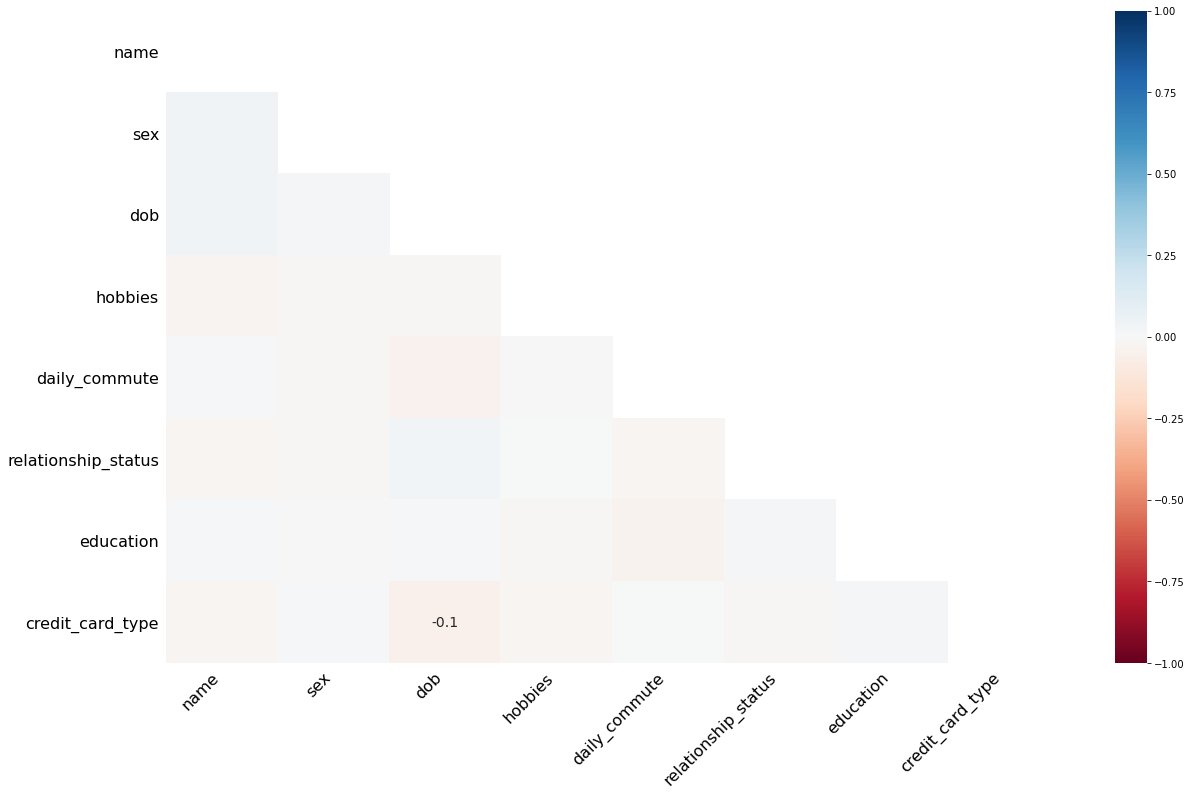

In [623]:
msno.heatmap(df_test)

In [624]:
df_test.describe()

,user_id,location_population,location_from_population,daily_commute,friends_number,education
count,2000.000000,2.000000e+03,2.000000e+03,1796.000000,2000.00000,1817.000000
mean,999.500000,3.336566e+05,3.096158e+05,49.928731,199.95200,3.644469
std,577.494589,5.114764e+05,4.962898e+05,28.881555,89.91402,1.350136
min,0.000000,9.920000e+02,8.960000e+02,0.000000,0.00000,1.000000
25%,499.750000,2.609200e+04,2.390700e+04,26.000000,144.00000,3.000000
50%,999.500000,9.562900e+04,7.765300e+04,49.000000,199.00000,4.000000
75%,1499.250000,4.038830e+05,3.398500e+05,75.000000,254.00000,5.000000
max,1999.000000,1.764615e+06,1.764615e+06,99.000000,543.00000,6.000000


In [625]:
df_test.describe(include=['object'])

,name,sex,dob,location,location_from,occupation,hobbies,relationship_status,credit_card_type
count,1994,1809,1809,2000,2000,2000,1684,1770,1795
unique,205,2,1709,492,492,43,1450,5,4
top,Irena,female,1975-10-11,Warszawa,Warszawa,"Building and related trades workers, excluding...",Bodybuilding,In relationship,Visa
freq,20,1019,3,189,176,57,11,597,915


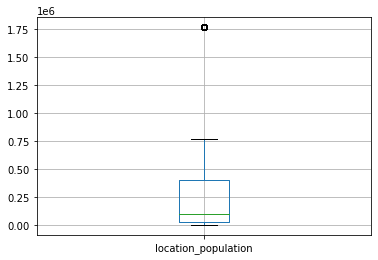

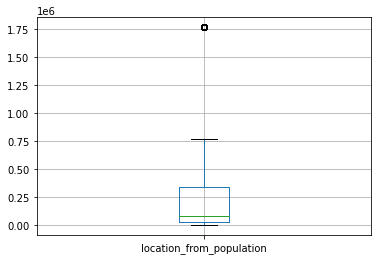

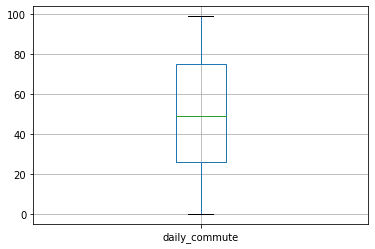

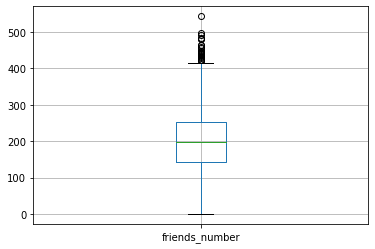

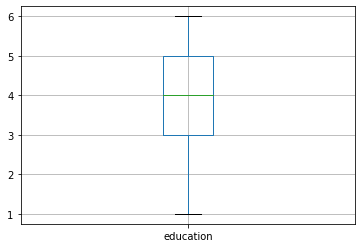

In [626]:
columns = ['location_population','location_from_population','daily_commute','friends_number','education']

for col in columns:
    df_test.boxplot(column=col)
    plt.show()

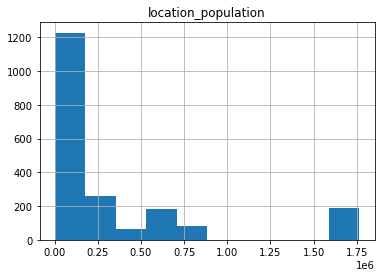

skew        2.152610
kurtosis    3.667186
Name: location_population, dtype: float64


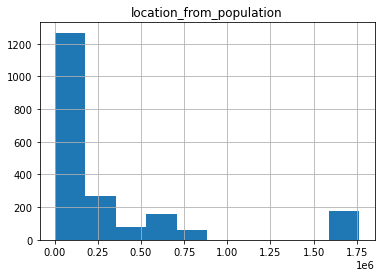

skew        2.302725
kurtosis    4.401283
Name: location_from_population, dtype: float64


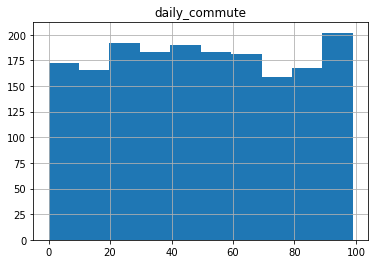

skew       -0.007612
kurtosis   -1.211932
Name: daily_commute, dtype: float64


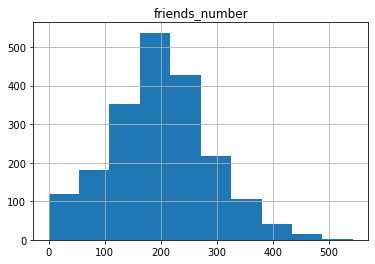

skew        0.120286
kurtosis    0.191918
Name: friends_number, dtype: float64


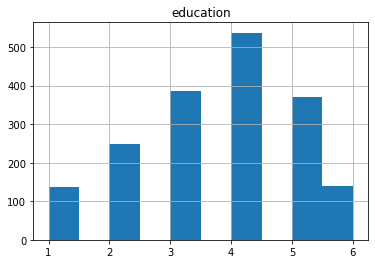

skew       -0.218158
kurtosis   -0.642943
Name: education, dtype: float64


In [627]:
for col in columns:
    df_test.hist(column=col)
    plt.show()
    print(df[col].agg(['skew', 'kurtosis']).transpose())

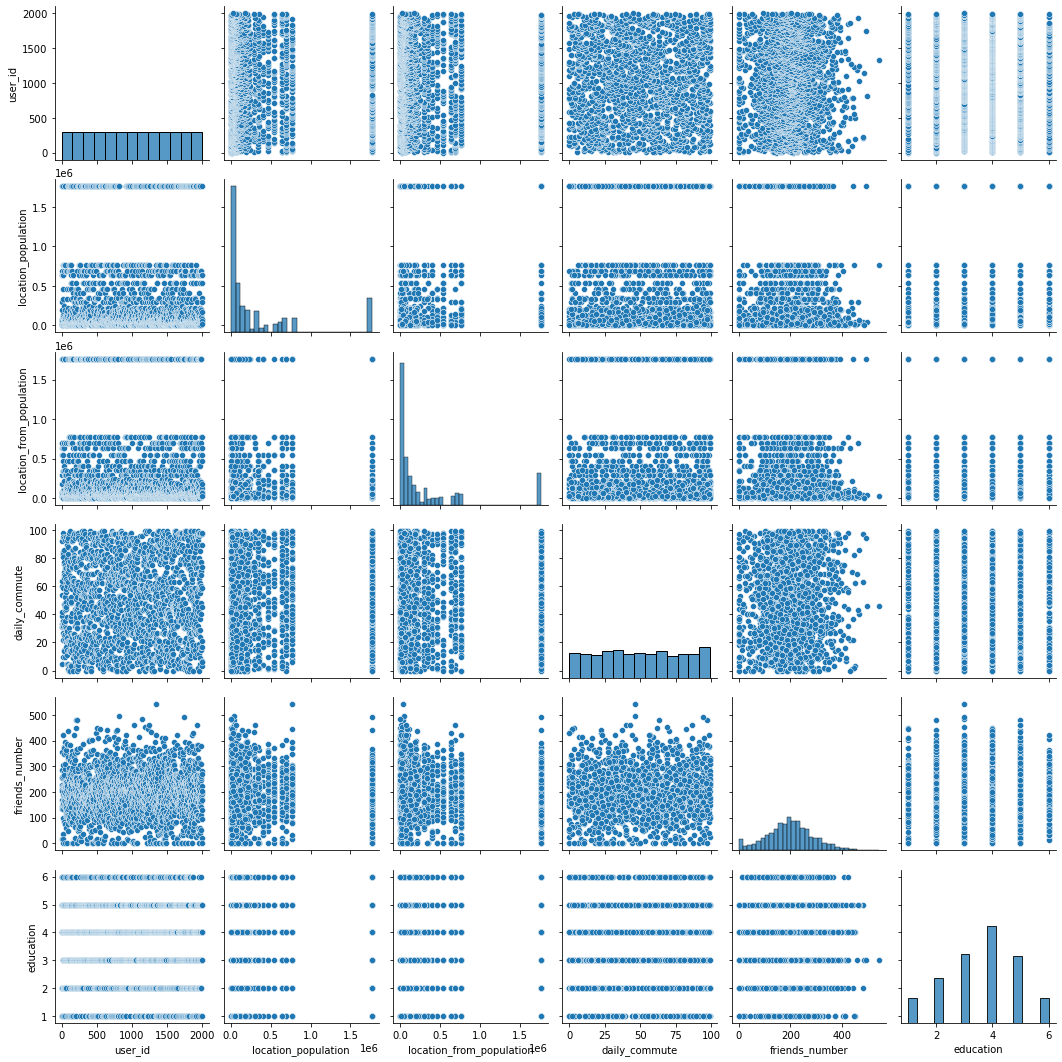

In [628]:
sns.pairplot(data = df_test)

In [629]:
corrMatrixTest = df_test.corr()

<AxesSubplot:>

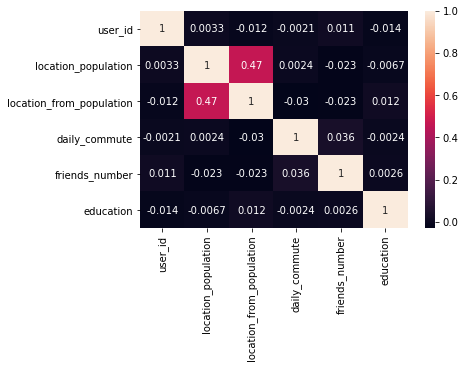

In [630]:
sns.heatmap(corrMatrixTest, annot = True)

Data above provide that the test.csv have similar distribution and correlation between variables to train.csv. 

# For test data preprocessing an function was made from transformations above.

To facilitate the work with the processing of test data, I took the code written above and created the function. 

In [631]:
def preprocess_data(csv_path = 'test.csv', json_path = 'test.json'):
    df = pd.read_csv(csv_path)

    # drop unnecessary columns
    df.drop('name', inplace=True, axis=1)
    df.drop('location', inplace=True, axis=1)
    df.drop('location_from', inplace=True, axis=1)

    groups = pd.read_json(json_path)

    # read json and create dataframe from it
    l = []
    for _, row in groups.iterrows():
        groups_and_time = row['data']['groups']['data']
        idx = row['data']['id']
        for item in groups_and_time:
            l.append([idx.strip(), item['group_name'].strip(), item['date_joined'].strip()])

    df_groups = pd.DataFrame(l, columns=['user_id', 'group_name', 'date_joined'])

    # count how many 
    groups_target1 = defaultdict(int)
    groups_target0 = defaultdict(int)

    for _, row in groups.iterrows():
        groups_and_time = row['data']['groups']['data']
        idx = int(row['data']['id'])
        for item in groups_and_time:
            if item['group_name'] in grouped_data_target1.index.values:
                groups_target1[idx] += 1
                
            if item['group_name'] in grouped_data_target0.index.values:
                groups_target0[idx] += 1

    df_top_groups_target1 = pd.DataFrame.from_dict(groups_target1, orient='index', columns=['count_groups_target1']).reset_index()
    df_top_groups_target1.rename(columns = {'index':'user_id'}, inplace = True)

    df_top_groups_target0 = pd.DataFrame.from_dict(groups_target0, orient='index', columns=['count_groups_target0']).reset_index()
    df_top_groups_target0.rename(columns = {'index':'user_id'}, inplace = True)

    user_and_groups_data = pd.merge(df, df_top_groups_target1, how="left", on=['user_id']).copy()
    user_and_groups_data = pd.merge(user_and_groups_data, df_top_groups_target0, how="left", on=['user_id'])

    user_and_groups_data['count_groups_target0'] = user_and_groups_data['count_groups_target0'].fillna(0).astype(int)
    user_and_groups_data['count_groups_target1'] = user_and_groups_data['count_groups_target1'].fillna(0).astype(int)

    job_df = pd.read_csv('occupations.csv')

    df = pd.merge(user_and_groups_data, job_df, how="left", on=['occupation'])
    df.drop('occupation', inplace=True, axis=1)
    df.drop('credit_card_type', inplace=True, axis=1)
    df['sex'].replace(['male','female'], [0,1],inplace=True)

    current_year = datetime.now().year
    df['dob'] = df.dob.str[:4]
    df['dob'] = pd.to_numeric(df['dob'], errors='coerce')
    df['dob'] = df['dob'].astype('Int32')
    df['dob'] = int(current_year) - df['dob'] 

    list_of_hobbies = ['Gym','Cardio','Squash','Bodybuilding','Stretching','Weightlifting','Crossfit','Power bike','Badminton','Rowing','Kettleballs','Dance','Fitness','Rafting','Skydiving','Jogging','Skateboarding','Ice skating','Skimboarding','Rock climbing','Archery','Horseback riding','Parkour','Table tennis','Sports','Hooping','Air sports','Cycling','Flag Football','Crossfit,Stretching','Motor sports','Hiking','Rugby','Water sports','Orienteering','Kitesurfing','Basketball','Tai chi','Brazilian jiu-jitsu','Surfing','Rappelling','Taekwondo','Kayaking','Snowboarding','Slacklining','Mountaineering','Swimming','Yoga','BASE jumping','Blacksmithing','Scuba diving','Netball','Roller skating','Kabaddi','Mountain biking','Running']
    df['sport_related_hobbies'] = df.apply(count_sport_related_hobbies, axis=1)
    df.drop('hobbies', inplace=True, axis=1)

    df['relationship_status'] = df['relationship_status'].fillna(df['relationship_status'].mode()[0])

    df = pd.get_dummies(df, prefix='', prefix_sep='', columns = ['relationship_status'])

    df_with_mode = df.fillna(df.mode().iloc[0])

    df_numerical = df_with_mode[['dob', 'location_population',
       'location_from_population', 'daily_commute', 'friends_number',
       'education', 'count_groups_target1', 'count_groups_target0',
        'job_physical_activity', 'sport_related_hobbies']]

    scaler = StandardScaler()
    standarized = scaler.fit_transform(df_numerical)
    standarized

    df_standarized_mode = pd.DataFrame(standarized, columns=['dob', 'location_population',
       'location_from_population', 'daily_commute', 'friends_number',
       'education', 'count_groups_target1', 'count_groups_target0',
        'job_physical_activity', 'sport_related_hobbies'])
    
    df = pd.concat([df_standarized_mode, df_with_mode[['sex', 'Divorced', 'In relationship', 'Married', 'Married with kids', 'Single']]], axis=1, join='inner')

    return df


# Model Selection and Training

The first step was to select the models. I took into account LogisticRegression, SVC, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier and GradientBoostingClassifier. Next I used cross-validation to estimate the skill of a machine learning model on unseen data. It turned out that the best score has GradientBoostingClassifier. Despite this, I decided to test best three models - GradientBoostingClassifier, SVC and LogisticRegression. I used GridSearch to identify the optimal hyperparameters for models.

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [242]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [243]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), GradientBoostingClassifier()]

__Below I used cross-validation which provides information about how well a classifier generalizes. I checked a few scores - accuracy, precision, recall and F1 score.__

In [244]:
for model in models:
    scores = cross_validate(model, df_X, df_y, cv=5, scoring=scoring)
    print(model)
    for key in scores:
        print(key, scores[key].mean())
    
    print()

LogisticRegression()
fit_time 0.02573051452636719
score_time 0.007374286651611328
test_accuracy 0.8995000000000001
test_precision 0.8329210647814282
test_recall 0.6264933670730772
test_f1_score 0.7139809129266521

SVC()
fit_time 0.22894287109375
score_time 0.10199699401855469
test_accuracy 0.90025
test_precision 0.8648429898275098
test_recall 0.5979679472433096
test_f1_score 0.7062140471600981

DecisionTreeClassifier()
fit_time 0.01574263572692871
score_time 0.0058005332946777345
test_accuracy 0.8522500000000001
test_precision 0.6274701631797218
test_recall 0.6587761674718197
test_f1_score 0.6423536053240567

GaussianNB()
fit_time 0.0035951614379882814
score_time 0.004977035522460938
test_accuracy 0.8734999999999999
test_precision 0.6574956750967955
test_recall 0.7791350356567748
test_f1_score 0.7126095224551429

KNeighborsClassifier()
fit_time 0.003815746307373047
score_time 0.10850791931152344
test_accuracy 0.8862500000000001
test_precision 0.7867915242165242
test_recall 0.5967487155

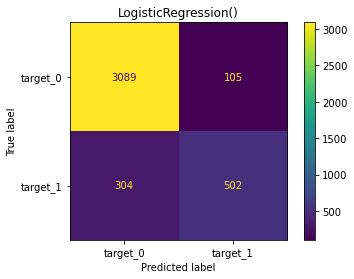

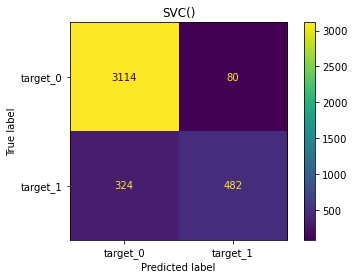

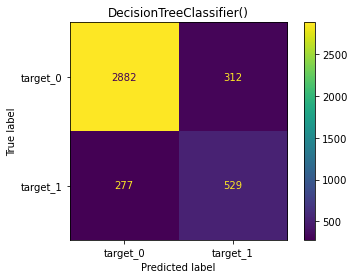

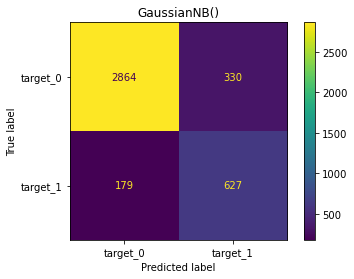

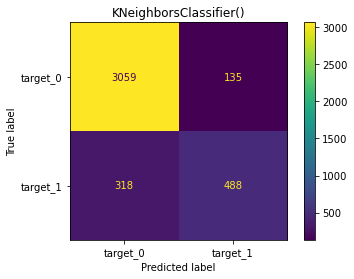

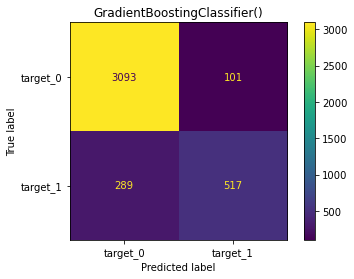

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
for model in models:
    y_pred = cross_val_predict(model, df_X, df_y, cv=10)
    conf_mat = confusion_matrix(df_y, y_pred)
    cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['target_0','target_1'])
    cmd.plot()
    cmd.ax_.set_title(model)

__True Positive:__ in each model we can see that value of true positive is significantly higher than rest - which means corectly predictions for target 0.

### GradientBoostingClassifier

In [166]:
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [10, 100, 500],
              'max_depth'    : [4,6,8]
             }

In [167]:
GBC = GradientBoostingClassifier()

In [168]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, n_jobs=-1, verbose=10)

In [169]:
grid_GBC.fit(df_X, df_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8], 'n_estimators': [10, 100, 500],
                         'subsample': [0.9, 0.5, 0.2]},
             verbose=10)

In [170]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.03, max_depth=4, subsample=0.2)

 The best score across ALL searched params:
 0.9059999999999999

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}


### LogisticRegression

In [171]:
parameters = {
    'penalty': ['l1','l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [172]:
lr = LogisticRegression()
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [173]:
grid_lr = GridSearchCV(estimator=lr, param_grid = parameters, n_jobs=-1, verbose=10)
grid_lr.fit(df_X, df_y)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=10)

In [174]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.1, penalty='l1', solver='saga')

 The best score across ALL searched params:
 0.8997499999999998

 The best parameters across ALL searched params:
 {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


### SVC

In [179]:
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [180]:
svc = SVC()

In [181]:
grid_svc = GridSearchCV(estimator=svc, param_grid = parameters, n_jobs=-1, verbose=10)
grid_svc.fit(df_X, df_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=10)

In [182]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_svc.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_svc.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_svc.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=100, gamma=0.01)

 The best score across ALL searched params:
 0.9037499999999999

 The best parameters across ALL searched params:
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


# Prediction - model with test data

In this section i run my function preprocess_data() to prepare test.csv and test.json for prediction. I trained GradientBoostingClassifier on train data and then I used this model with test data to generate target variable. 

In [632]:
test_X = preprocess_data()

In [633]:
test_X.head()

,dob,location_population,location_from_population,daily_commute,friends_number,education,count_groups_target1,count_groups_target0,job_physical_activity,sport_related_hobbies,sex,Divorced,In relationship,Married,Married with kids,Single
0,0.510245,-0.639115,-0.583800,0.296232,-0.600190,-2.074215,-0.446680,-0.386186,-1.109474,-0.042949,0.0,0,0,0,0,1
1,-0.748066,-0.620682,0.461574,0.296232,0.100655,-1.299387,-0.446680,-0.386186,1.140981,0.922201,0.0,0,0,0,1,0
2,-1.377222,-0.593430,-0.563136,-0.431074,0.145153,0.250269,1.391509,2.277168,0.015753,-1.008100,1.0,0,0,1,0,0
3,-0.957785,-0.590784,-0.603272,-0.321978,0.968367,0.250269,1.391509,-0.386186,1.140981,2.852502,1.0,0,0,0,0,1
4,-0.538348,-0.281598,-0.275202,0.296232,0.289771,0.250269,-0.446680,-0.386186,-1.109474,0.922201,0.0,0,1,0,0,0


In [634]:
GBC_for_prediction = GradientBoostingClassifier(learning_rate=0.03, max_depth=4, subsample=0.2)
GBC_for_prediction.fit(df_X, df_y)  # train_X, train_y
target_for_test_data = GBC_for_prediction.predict(test_X) 
proba_for_test_data = GBC_for_prediction.predict_proba(test_X) 

In [635]:
target_for_test_data

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [636]:
proba_for_test_data[:,1]

array([0.10273956, 0.14976948, 0.58631107, ..., 0.04136721, 0.27401327,
       0.02883815])

In [639]:
df_answer = pd.DataFrame({'probability': proba_for_test_data[:,1],'target': target_for_test_data})
df_answer.reset_index(inplace=True)
df_answer = df_answer.rename(columns = {'index':'user_id'})
df_answer

,user_id,probability,target
0,0,0.102740,0
1,1,0.149769,0
2,2,0.586311,1
3,3,0.594178,1
4,4,0.231816,0
...,...,...,...
1995,1995,0.384287,0
1996,1996,0.907271,1
1997,1997,0.041367,0
1998,1998,0.274013,0


In [641]:
df_answer.to_csv('scored_test.csv', index=False)

# Model Quality Assessment

| Model | Accuracy | Precision | Recall | F1 score |
| :- | :- | :- | :- | :- |
| GradientBoostingClassifier | 0.9022 | 0.8255 | 0.6525 | 0.7284 |
| SVC | 0.9002 | 0.8648 | 0.5979 | 0.7062 |
| LogisticRegression | 0.8995 | 0.8329 | 0.6264 | 0.7139 |

Accuracy is simply a ratio of correctly predicted observation to the total observations. Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. In our example we don't have symmetric dataset. Therefore, I have to look at other parameters to evaluate the performance of models. In this case F1 Score is more useful than accuracy. F1 Score is the weighted average of Precision and Recall. 
The table above shows that the best results are obtained from the GradientBoostingClassifier model.

# Findings

Transforming json file revealed interesting tendencies. People with target 1 - which means people interested in long-term gym subscription belong to groups mostly related to different kind of sport. On the other hand people not interested in long-term gym subscription are not interested in groups related to sport, they prefer for example groups related to travel, foods. Relationship_status column also contains information about human behavior. The most people with target 1 are single in contrast to people with target 0 which are mostly in relationships or maried and have kids. It also turned out that distribution of job type is similar in target 1 and target 0 groups.

# Limitations of the Approach

The conducted analyzes revealed disproportion in the dataset, in target column. Another limitation is column hobby. I transformed text data into numerical values but my solution is not flexible. The list of hobbies related to sport does not contain all possible examples so it could not work properly on another datasets. Similar issue occurs with occupation column. Problematic could be also the fact that the dataset has a relatively small number of records.